# Ridge Regression

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=25,
    coef=True,
    random_state=1
)

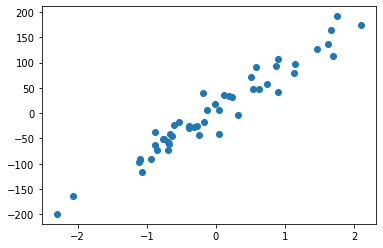

In [ ]:
plt.scatter(X, y)

In [ ]:
rr = Ridge(alpha=3, tol=0.00000001)
rr.fit(X, y)
w = rr.coef_
rr.intercept_, w

(5.331097308520757, array([79.83699746]))

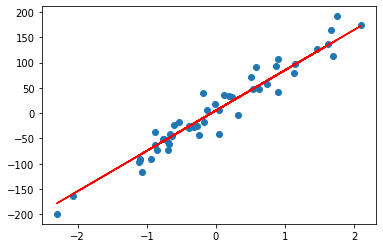

In [ ]:
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

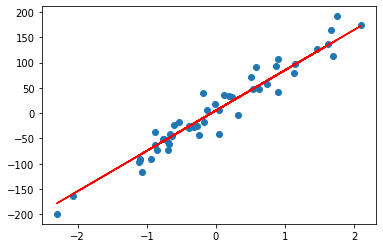

In [ ]:
rr = Ridge(alpha=3)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

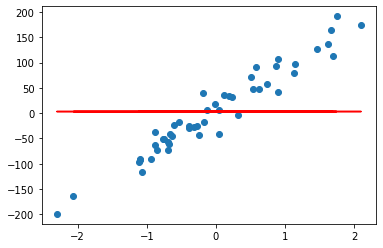

In [ ]:
rr = Ridge(alpha=1000000)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

In [ ]:
rr.intercept_, rr.coef_

(3.294170310146944, array([0.00399207]))

## Lasso Regression

#### Fit a linear model using sklearn with Lasso regularization

In [ ]:
from sklearn.linear_model import Lasso
rr = Lasso(alpha=10)
rr.fit(X, y)
w = rr.coef_[0]
rr.intercept_, rr.coef_

(5.18970142386973, array([74.2952876]))

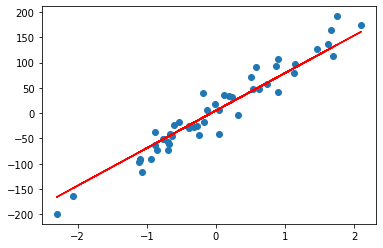

In [ ]:
from sklearn.linear_model import Lasso
rr = Lasso(alpha=10)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

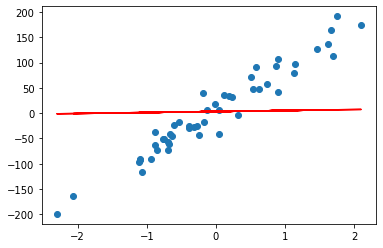

In [ ]:
rr = Lasso(alpha=78)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

In [ ]:
print(w, rr.intercept_)

1.9628169225336884 3.344149428408111


## Implement function
`fit_1d_ridge_regression` that takes two vectors $x$ and $y$ and int lmb, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope using ridge regression matrix form.

In [ ]:
def fit_1d_ridge_regression(data_vector, response_vector, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    """
    m = data_vector.shape[0]
    X_b = np.c_[np.ones(m), data_vector]
    p = X_b.shape[1]
    reg_term = np.eye(p).dot(lmb)
    reg_term[0,0] = 0
    beta = np.linalg.inv(X_b.T.dot(X_b) + reg_term).dot(X_b.T).dot(response_vector)
    
    return beta

In [ ]:
w = fit_1d_ridge_regression(X, y, 100)

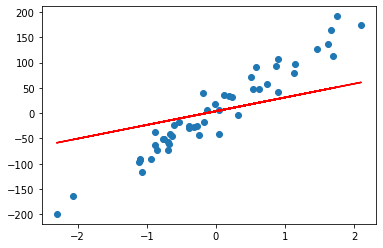

In [ ]:
plt.scatter(X, y)
plt.plot(X, w[0]+w[1]*X, c='red')

In [ ]:
w

array([ 3.98698267, 27.15729366])

In [ ]:
def fit_1d_lasso_regression(data_vector, response_vector, n_iterations = 1000, learning_rate = 0.1, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    m = data_vector.shape[0]
    X_b = np.c_[np.ones(m), data_vector]
    n = X_b.shape[1]
    
    theta = np.random.randn(n)
    while 0 in theta:
        theta = np.random.randn(n)
        
    # theta = np.zeros(n)
    
    for i in range(n_iterations):
        # theta_derivatives = np.array([-1 if i < 0 else 1 for i in theta])
        theta_derivatives = np.sign(theta)
        theta_derivatives[0] = 0
        gradient = 1/m*X_b.T.dot(X_b.dot(theta) - response_vector) + lmb*theta_derivatives
        theta = theta - learning_rate*gradient
    
    return theta

In [ ]:
w = fit_1d_lasso_regression(X, y, learning_rate=0.001, lmb=3, n_iterations = 50000)
w

array([ 5.37968472, 81.74127723])

In [ ]:
# sklearn lasso results - alpha (lmb)
# (5.461106129084673, array([84.93241565])) - 0
# (5.37968471752019, array([81.74127723])) - 3
# (5.18970142386973, array([74.2952876])) - 10
# (3.29406845296282, array([0.])) - 100

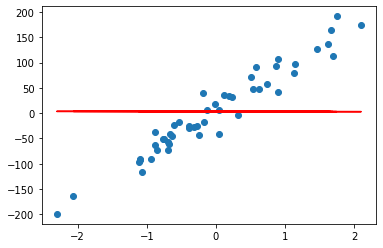

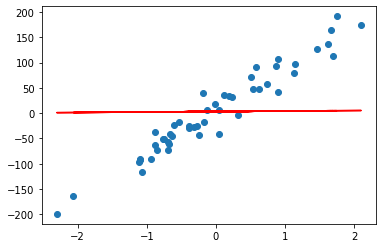

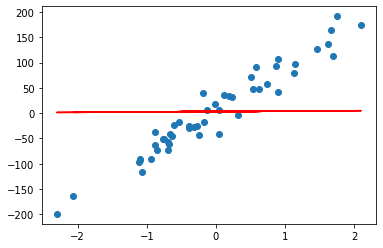

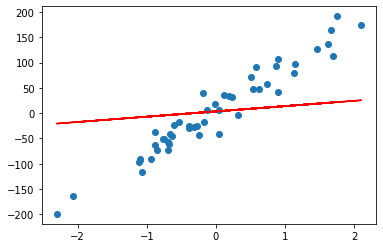

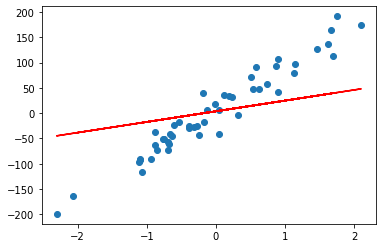

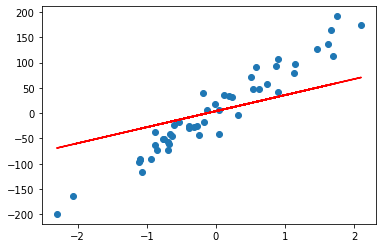

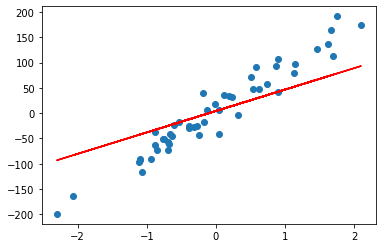

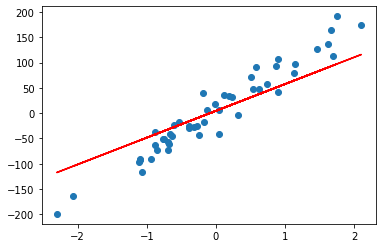

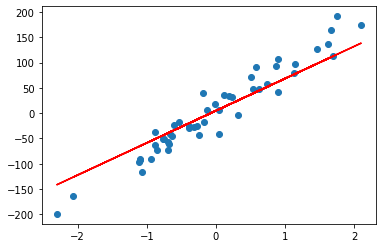

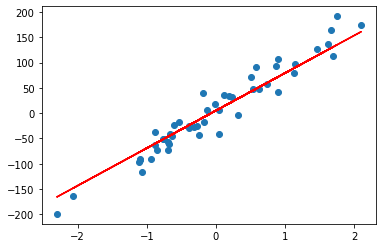

In [ ]:
for lmb in range(100, 0, -10):
    w = fit_1d_lasso_regression(X, y, learning_rate=0.01, lmb=lmb)
    plt.scatter(X, y)
    plt.plot(X, w[0]+w[1]*X, c='red')
    plt.show()

## Apply your implemented lasso and ridge regression functions to the data

In [ ]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())

(506, 14)
        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [ ]:
X = dataframe[dataframe.columns.difference([13])]
y = dataframe[13]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
beta = fit_1d_lasso_regression(X_train, y_train, n_iterations=10000, learning_rate=0.000001, lmb=1)
beta

array([ 0.85573695, -0.34391181,  0.20741763,  0.79113384,  2.16410926,
        0.46851259, -1.14941019,  0.00541464,  0.06080976,  0.50624237,
       -0.02852932, -0.22301106,  0.07297624,  0.19183626])

In [ ]:
lr = Lasso()
lr.fit(X_train, y_train)
lr_cf = np.append(lr.intercept_, lr.coef_)

In [ ]:
for c, b in zip(lr_cf, beta):
    print(f'{c:.03f} {b:.03f}')

34.936 0.856
-0.077 -0.344
0.029 0.207
-0.000 0.791
0.000 2.164
-0.000 0.469
1.630 -1.149
0.016 0.005
-0.631 0.061
0.220 0.506
-0.012 -0.029
-0.709 -0.223
0.011 0.073
-0.747 0.192


---

### Optional: tuning ridge hyperparametr

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.model_selection import RepeatedKFold
from pandas import read_csv

# load the dataset
# description: https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.379
Config: {'alpha': 0.51}


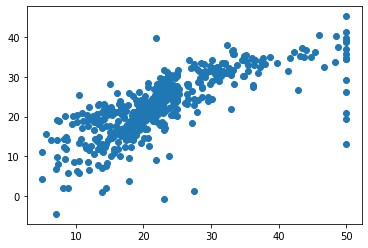

In [ ]:
predictions = cross_val_predict(Ridge(alpha=0.51), X, y)
plt.scatter(y, predictions)
plt.show()

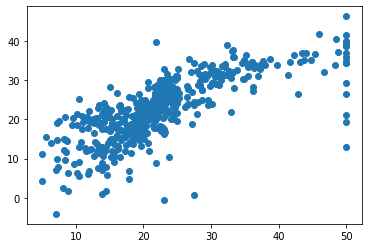

In [ ]:
predictions = cross_val_predict(Ridge(alpha=0), X, y)
plt.scatter(y, predictions)

## Optional: Implement GridSearchCV using numpy 

In [ ]:
import numpy as np
from sklearn import metrics
from inspect import signature
from itertools import product
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

class MyGridSearchCV:
    
    def __init__(self, estimator, param_grid: dict, scoring=None, refit=True, cv=None):
        self.estimator = estimator
        self.param_grid = param_grid
        self.scoring = scoring
        self.refit = refit
        if cv is None:
            self.cv = KFold()
        else:
            self.cv = cv
            
        scoring_dict = {'explained_variance': metrics.explained_variance_score,
                        'max_error': metrics.max_error,
                        'neg_mean_absolute_error': metrics.mean_absolute_error,
                        'neg_mean_squared_error': metrics.mean_squared_error,
                        'neg_root_mean_squared_error': metrics.mean_squared_error, 
                        'neg_mean_squared_log_error': metrics.mean_squared_log_error,
                        'neg_median_absolute_error': metrics.median_absolute_error,
                        'r2': metrics.r2_score,
                        'neg_mean_poisson_deviance': metrics.mean_poisson_deviance,
                        'neg_mean_gamma_deviance': metrics.mean_gamma_deviance}
        
        if self.scoring is not None:
            assert(self.scoring in scoring_dict.keys()),'no such scoring: ' + str(self.scoring) + '.'
            self.scoring = scoring_dict[scoring]
            
        model = estimator.__init__

        sig = signature(model)

        for i in self.param_grid.keys():
            assert(i in sig.parameters.keys()), type(estimator).__name__ + " object has no argument like: " + str(i) 
         

    def fit(self, X, y):
        
        X, y = np.array(X), np.array(y)
        
        all_list = [list(i) for i in self.param_grid.values()]

        permutations = list(product(*all_list)) 

        parameters = list()
        for i in permutations:
            permutation_dict = dict()
            for ind, val in enumerate(i):
                permutation_dict[list(self.param_grid.keys())[ind]] = val
            parameters.append(permutation_dict)

        scores = list()
        for param_dict in parameters:
            for param in list(self.estimator.get_params().keys()):
                if param in param_dict:
                    self.estimator.__setattr__(param, param_dict[param])
            scr = list()
            for train_index, test_index in cv.split(X):
                xTrain, xTest, yTrain, yTest = X[train_index], X[test_index], y[train_index], y[test_index]
                self.estimator.fit(xTrain, yTrain)
                y_pred = self.estimator.predict(xTest)
                if self.scoring is not None:
                    scr.append(self.scoring(y_pred, yTest))
                else:
                    scr.append(self.estimator.score(xTest, yTest))
            scores.append(np.mean(scr))
        scores = np.array(scores)
        self.best_score_ = np.min(scores)
        self.best_params_ = parameters[np.where(scores == np.min(scores))[0][0]]
        
        if self.refit:
            for param in list(self.estimator.get_params().keys()):
                if param in param_dict:
                    self.estimator.__setattr__(param, self.best_params_[param])
            
            self.predict = self.estimator.predict
        
        return self

In [ ]:
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = MyGridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: 3.379
Config: {'alpha': 0.51}


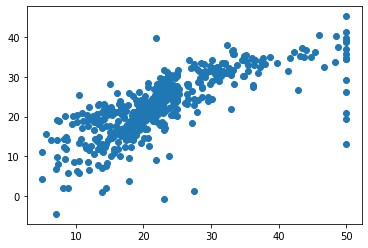

In [ ]:
predictions = cross_val_predict(Ridge(alpha=0.51), X, y)
plt.scatter(y, predictions)
plt.show()

In [ ]:
y_pred = results.predict(X)
print('MAE: %.3f' % metrics.mean_absolute_error(y_pred, y))

MAE: 3.301
